Cumulative variance: [0.26218358 0.39215559 0.50344468 0.60904496 0.69338375 0.77410414
 0.847195   0.91538811 0.95766753 0.98726331 1.        ]


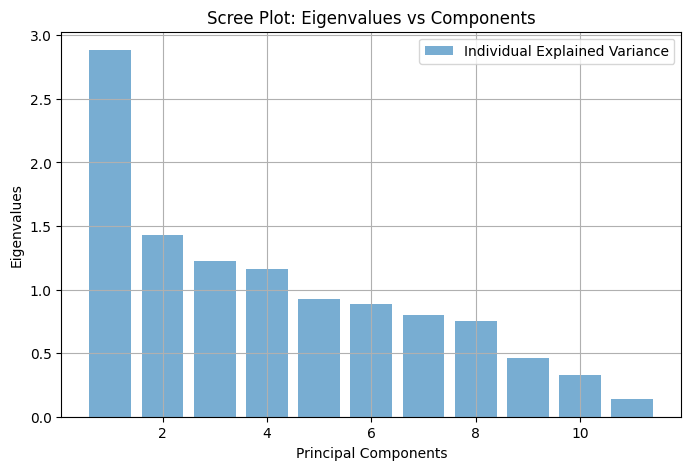

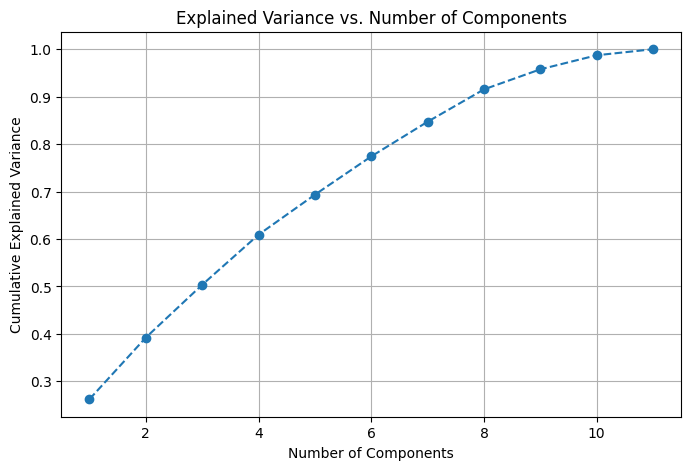

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

#selecting numerical features for pca
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
x = df[features].values

#standardizing the features
x = StandardScaler().fit_transform(x)

#initialize pca with number of comps
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(x)

#calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(f'Cumulative variance: {cumulative_variance}')

#scree plot for cumulative var
plt.figure(figsize=(8, 5))
eigenvalues = pca.explained_variance_
plt.bar(range(1, len(features) + 1), eigenvalues, alpha=0.6, label='Individual Explained Variance')
# plt.plot(range(1, len(features) + 1), cumulative_variance, marker='o', color='r', linestyle='--', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot: Eigenvalues vs Components')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(features) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# explanation:
# PCA first standardizes the data to identify principal components (new vars that maximize variance while being uncorrelated).
# The cumulative variance explains how many components are needed to retain most of the information in the data, and a 
# scree plot is generated to visualize the variance, helping make an informated decision as to how many features to reduce.

# #determine the optimal # of clusters using elbow 
# wcss = []  # Within-cluster sum of squares
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, random_state=0)
#     kmeans.fit(principal_components[:, :2])  # Using the first 2 principal components
#     wcss.append(kmeans.inertia_)

# #plot the elbow curve
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.title('Elbow Method for Optimal Number of Clusters')
# plt.grid(True)
# plt.show()
